In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fast")

In [3]:
stats = pd.read_csv("stats_PL.csv")
results = pd.read_csv("results_PL.csv")
pd.set_option('display.max_columns', 10)

In [3]:
# PRVI DEO - RAZUMEVANJE PODATAKA

In [4]:
stats.head()

team  wins  losses  goals  total_yel_card  ...  dispossessed  \
0  Manchester United  28.0     5.0   83.0            60.0  ...           NaN   
1            Chelsea  24.0     3.0   64.0            62.0  ...           NaN   
2          Liverpool  20.0    10.0   57.0            44.0  ...           NaN   
3            Arsenal  19.0     8.0   63.0            59.0  ...           NaN   
4  Tottenham Hotspur  17.0    12.0   57.0            48.0  ...           NaN   

   penalty_save  total_high_claim  punches     season  
0           2.0              37.0     25.0  2006-2007  
1           1.0              74.0     22.0  2006-2007  
2           0.0              51.0     27.0  2006-2007  
3           0.0              88.0     27.0  2006-2007  
4           0.0              51.0     24.0  2006-2007  

[5 rows x 42 columns]

In [5]:
'''
NAPAD
total_scoring_att - ukupno suteva na gol
ontarget_scoring_att - ukupno suteve u okvir gola
hit_woodwork - ukupno pogodaka okvira gola
att_hd_goal - ukupno golova datih glavom
att_pen_goal - ukupno golova datih iz penala
att_freekick_goal - ukupno golova datih iz slobodnih udaraca
att_ibox_goal - ukupno golova datih u okviru sesnaesterca
att_obox_goal - ukupno golova datih van sesnaesterca
goal_fastbreak - ukupno golova datih iz kontra napada
total_offside - ukupno dosudjenih ofsajda

ODBRANA
clean_sheet - ukupno utakmica bez primljenog gola
goals_conceded - ukupno primljenih golova
saves - ukupno odbrana od strane golmana
outfielder_block - ukupno blokova suteva protivnickih igraca 
interception - ukupno presecenih dodavanja
total_tackle - ukupno startova na loptu
last_man_tackle - ukupno startova na poslednjeg igraca
total_clearance - ukupno ispucanih lopti
head_clearance - ukupno ispucanih lopti glavom
own_goals - ukupno auto golova
penalty_conceded - ukupno napravljenih penala
pen_goals_conceded - ukupno golova primljenih iz penala

TIMSKA IGRA
total_pass - ukupno razmenjenih kratkih dodavanja
total_through_ball - ukupno odigranih polu visokih lopti
total_long_balls - ukupno dugih dodavanja
backward_pass - ukupno dodavanja petom
total_cross - ukupno centriranja iz ugla
corner_taken - ukupno izvedenih kornera

OSTALO
touches - ukupno dodira
big_chance_missed - ukupno promasenih izglednih sansi
clearance_off_line - ukupno sprecenih cistih golova
dispossessed - ukupno izgubljenih lopti
penalty_save - ukupno sacuvanih penala
total_high_claim - ukupno uvhacenih visokih lopti od strane golmana
punches - ukupno deganziranih lopti od strane golmana
'''

'\nNAPAD\ntotal_scoring_att - ukupno suteva na gol\nontarget_scoring_att - ukupno suteve u okvir gola\nhit_woodwork - ukupno pogodaka okvira gola\natt_hd_goal - ukupno golova datih glavom\natt_pen_goal - ukupno golova datih iz penala\natt_freekick_goal - ukupno golova datih iz slobodnih udaraca\natt_ibox_goal - ukupno golova datih u okviru sesnaesterca\natt_obox_goal - ukupno golova datih van sesnaesterca\ngoal_fastbreak - ukupno golova datih iz kontra napada\ntotal_offside - ukupno dosudjenih ofsajda\n\nODBRANA\nclean_sheet - ukupno utakmica bez primljenog gola\ngoals_conceded - ukupno primljenih golova\nsaves - ukupno odbrana od strane golmana\noutfielder_block - ukupno blokova suteva protivnickih igraca \ninterception - ukupno presecenih dodavanja\ntotal_tackle - ukupno startova na loptu\nlast_man_tackle - ukupno startova na poslednjeg igraca\ntotal_clearance - ukupno ispucanih lopti\nhead_clearance - ukupno ispucanih lopti glavom\nown_goals - ukupno auto golova\npenalty_conceded - 

In [5]:
results.head()

home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season  
0  2006-2007  
1  2006-2007  
2  2006-2007  
3  2006-2007  
4  2006-2007

In [7]:
'''
home_goals - postignuto golova od strane domaceg tima
away_goals - postignuto golova od strane gostujuceg tima
results : H - pobeda domaceg tima (home), 
          A - pobeda gustujuceg tima (away), 
          D - neresen rezultat (draw)
'''

'\nhome_goals - postignuto golova od strane domaceg tima\naway_goals - postignuto golova od strane gostujuceg tima\nresults : H - pobeda domaceg tima (home), \n          A - pobeda gustujuceg tima (away), \n          D - neresen rezultat (draw)\n'

In [6]:
points = stats.loc[:,["team","wins","losses","goals","goals_conceded","season"]].sort_values(["team", "season"])
points["draws"] = 38 - (points["wins"] + points["losses"])
points["goal difference"] = points["goals"] - points["goals_conceded"]
points["points"] = 3*points["wins"] + points["draws"]
season = points.pop("season")
points["season"] = season
points

team  wins  losses  goals  goals_conceded  draws  \
192          AFC Bournemouth  11.0    18.0   45.0            67.0    9.0   
207          AFC Bournemouth  12.0    16.0   55.0            67.0   10.0   
230          AFC Bournemouth  11.0    16.0   45.0            61.0   11.0   
3                    Arsenal  19.0     8.0   63.0            35.0   11.0   
22                   Arsenal  24.0     3.0   74.0            31.0   11.0   
..                       ...   ...     ...    ...             ...    ...   
114           Wigan Athletic  11.0    17.0   42.0            62.0   10.0   
137           Wigan Athletic   9.0    20.0   47.0            73.0    9.0   
75   Wolverhampton Wanderers   9.0    18.0   32.0            56.0   11.0   
95   Wolverhampton Wanderers  11.0    20.0   46.0            66.0    7.0   
119  Wolverhampton Wanderers   5.0    23.0   40.0            82.0   10.0   

     goal difference  points     season  
192            -22.0    42.0  2015-2016  
207            -12.0    46.0  2016-2017  
230            -16.0    44.0  2017-2018  
3               28.0    68.0  2006-2007  
22              43.0    83.0  2007-2008  
..               ...     ...        ...  
114            -20.0    43.0  2011-2012  
137            -26.0    36.0  2012-2013  
75             -24.0    38.0  2009-2010  
95             -20.0    40.0  2010-2011  
119            -42.0    25.0  2011-2012  

[240 rows x 9 columns]

In [10]:
seasons = pd.unique(stats["season"])
print(seasons)
print("\n" + "Ukupno sezona : ", len(seasons))


['2006-2007' '2007-2008' '2008-2009' '2009-2010' '2010-2011' '2011-2012'
 '2012-2013' '2013-2014' '2014-2015' '2015-2016' '2016-2017' '2017-2018']

Ukupno sezona :  12


In [8]:
# broj timova po sezoni

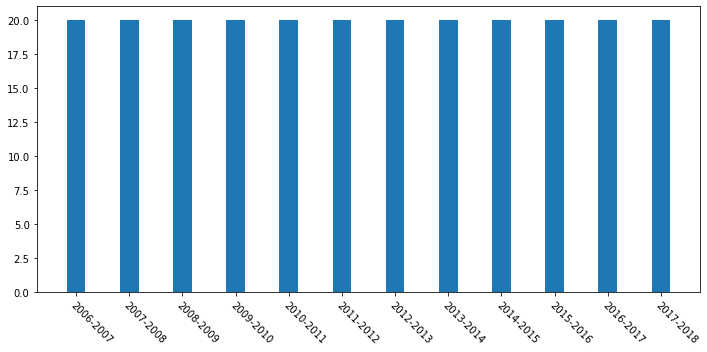

In [9]:
plt.figure(figsize=(10,5))
teams_per_season = pd.DataFrame(stats.groupby("season")["team"].count())
plt.bar(teams_per_season.index, teams_per_season["team"].values, width=0.35)

plt.xticks(teams_per_season.index, teams_per_season.index, rotation=-45,ha="left",rotation_mode="anchor")
plt.tight_layout()
plt.show()

In [12]:
# Broj utakmica svakog tima po sezoni na domacem i na gostujucem terenu

In [11]:
one_season = results[results["season"] == "2006-2007"]
matches_per_season = one_season.groupby("home_team").aggregate({"home_team" : "count", "away_team" : "count"})
matches_per_season.head()

home_team  away_team
home_team                              
Arsenal                   19         19
Aston Villa               19         19
Blackburn Rovers          19         19
Bolton Wanderers          19         19
Charlton Athletic         19         19

In [14]:
# Ukupan broj utakmica za svih 12 sezona

                   total  seasons
home_team                        
Liverpool            456     12.0
Tottenham Hotspur    456     12.0
Manchester United    456     12.0
Manchester City      456     12.0
Arsenal              456     12.0


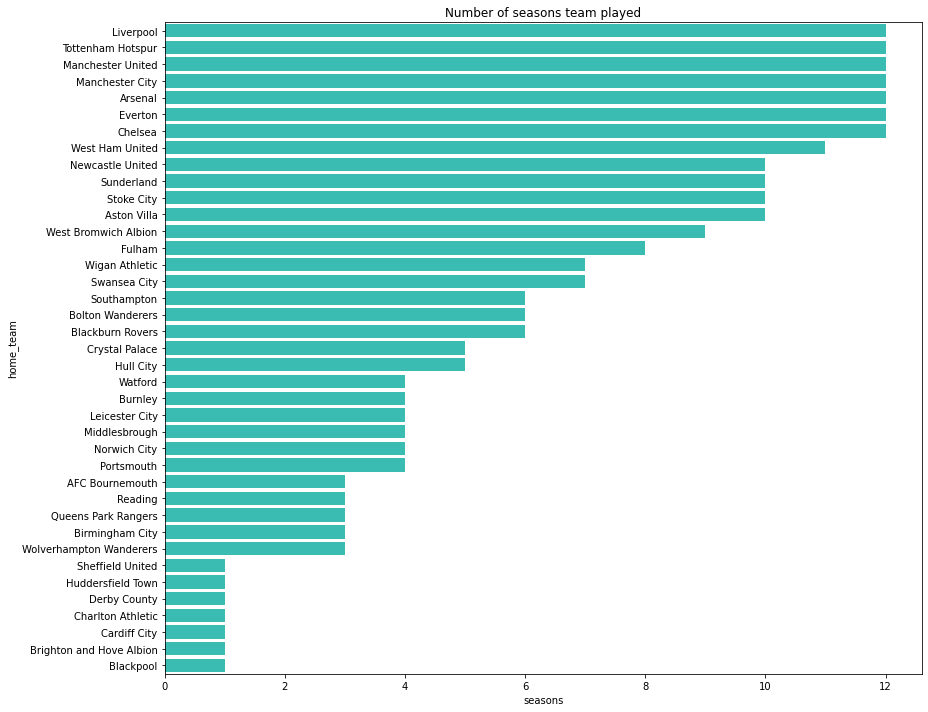

In [15]:
all_seasons_matches = results.groupby("home_team").aggregate({"home_team" : "count", "away_team" : "count"})
all_seasons_matches.columns = ["home", "away"]
all_seasons_matches["total"] = all_seasons_matches["home"] + all_seasons_matches["away"]
all_seasons_matches["seasons"] = all_seasons_matches["total"] / 38
all_seasons_matches = all_seasons_matches.drop(["home", "away"], axis=1)
all_seasons_matches = all_seasons_matches.sort_values("total", ascending=False)
print(all_seasons_matches.head())

fig, ax = plt.subplots(figsize=(13,10))
sns.barplot(x=all_seasons_matches["seasons"].values, y=all_seasons_matches.index, color="#26D1C4")
ax.set_title("Number of seasons team played")
ax.set_xlabel("seasons")
plt.tight_layout()
plt.show()

In [16]:
'''
Timovi koji su ucestvovali u svih 12 sezona : Liverpul, Totenhem, 
Mancester Junajted, Mancester Siti, Arsenal, Everton i Celzi
'''

'\nTimovi koji su ucestvovali u svih 12 sezona : Liverpul, Totenhem, \nMancester Junajted, Mancester Siti, Arsenal, Everton i Celzi\n'

In [17]:
# Null vrednosti

In [18]:
results.isna().any()

home_team     False
away_team     False
home_goals    False
away_goals    False
result        False
season        False
dtype: bool

In [19]:
stats.isna().any().sort_values(ascending=False)

total_through_ball       True
big_chance_missed        True
head_clearance           True
backward_pass            True
saves                    True
dispossessed             True
goals                   False
att_pen_goal            False
clean_sheet             False
total_offside           False
goal_fastbreak          False
att_obox_goal           False
att_ibox_goal           False
wins                    False
att_freekick_goal       False
att_hd_goal             False
hit_woodwork            False
goals_conceded          False
ontarget_scoring_att    False
losses                  False
total_scoring_att       False
total_red_card          False
total_yel_card          False
season                  False
interception            False
outfielder_block        False
total_long_balls        False
total_high_claim        False
penalty_save            False
clearance_off_line      False
touches                 False
corner_taken            False
total_cross             False
total_pass

In [20]:
stats.loc[stats["total_through_ball"].isna(),"season"]
stats["total_through_ball"].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
235    26.0
236    23.0
237    56.0
238    33.0
239    34.0
Name: total_through_ball, Length: 240, dtype: float64

In [21]:
stats.loc[stats["big_chance_missed"].isna(),"season"]
stats = stats.drop("big_chance_missed",axis=1)

In [22]:
stats.loc[stats["head_clearance"].isna(),"season"]
stats["head_clearance"].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
235    490.0
236    499.0
237    509.0
238    609.0
239    544.0
Name: head_clearance, Length: 240, dtype: float64

In [23]:
stats.loc[stats["backward_pass"].isna(),"season"]
stats = stats.drop("backward_pass",axis=1)

In [24]:
stats.loc[stats["saves"].isna(),"season"]
stats["saves"].fillna(0)

0        2.0
1        4.0
2        1.0
3        6.0
4       11.0
       ...  
235    103.0
236    137.0
237    110.0
238    152.0
239    102.0
Name: saves, Length: 240, dtype: float64

In [25]:
stats.loc[stats["dispossessed"].isna(),"season"]
stats["dispossessed"].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
235    416.0
236    439.0
237    379.0
238    402.0
239    446.0
Name: dispossessed, Length: 240, dtype: float64

In [26]:
# Pregled rezultata po sezonama

In [27]:
home_wins_per_seasons = results[results["result"] == "H"].groupby("season")["result"].count()
away_wins_per_seasons = results[results["result"] == "A"].groupby("season")["result"].count()
draws_per_seasons = results[results["result"] == "D"].groupby("season")["result"].count()
draws_per_seasons.head()

season
2006-2007     98
2007-2008    100
2008-2009     97
2009-2010     96
2010-2011    111
Name: result, dtype: int64

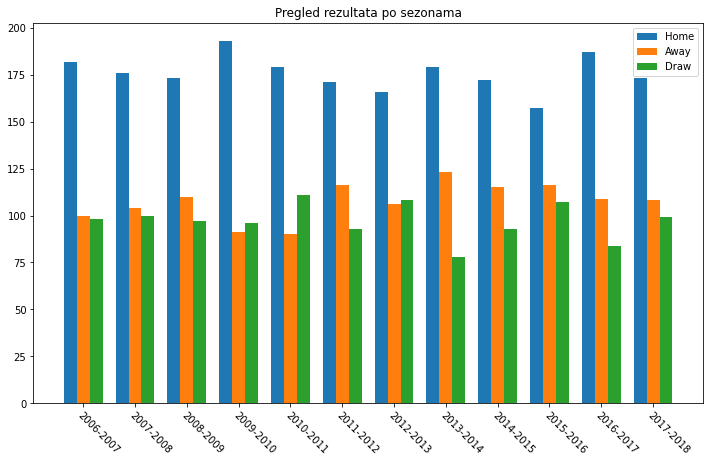

In [28]:
x_indexes = np.arange(len(draws_per_seasons.index))
width=0.25

plt.figure(figsize=(12,7))
plt.bar(x_indexes-width, home_wins_per_seasons, label="Home", width=width)
plt.bar(x_indexes, away_wins_per_seasons, label="Away", width=width)
plt.bar(x_indexes+width, draws_per_seasons, label="Draw", width=width)
plt.legend()
plt.title("Pregled rezultata po sezonama")

plt.xticks(ticks=x_indexes, labels=draws_per_seasons.index, rotation=-45, ha="left", rotation_mode="anchor")
plt.show()

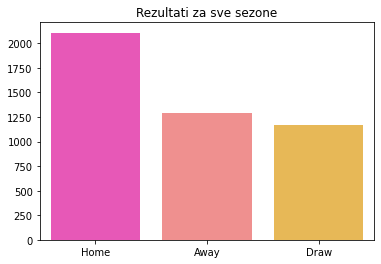

In [29]:
total_home_wins = home_wins_per_seasons.sum()
total_away_wins = away_wins_per_seasons.sum()
total_draws = draws_per_seasons.sum()
labels = ["Home", "Away", "Draw"]

sns.barplot(x=labels,y=[total_home_wins,total_away_wins,total_draws], palette="spring")
plt.title("Rezultati za sve sezone")
plt.show()

In [30]:
# Pregled ukupnih golova

In [31]:
print(results["home_goals"].sum())

print(results["away_goals"].sum())

7037.0
5218.0


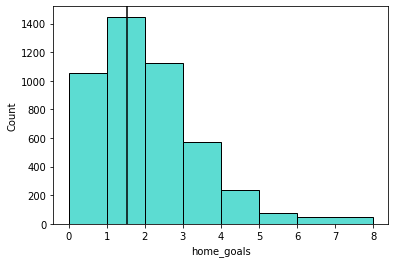

In [32]:
bins=[0,1,2,3,4,5,6,8]
sns.histplot(results["home_goals"],bins=bins,color="#26D1C4",edgecolor="black")
plt.axvline(results["home_goals"].mean(),0,1,color="black")
plt.show()

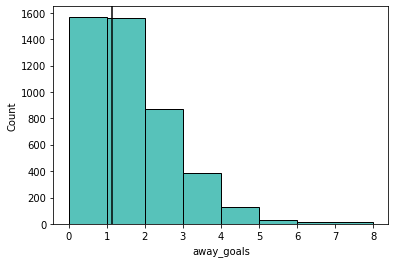

In [33]:
bins=[0,1,2,3,4,5,6,8]
sns.histplot(results["away_goals"],bins=bins,color="#1FAEA3",edgecolor="black")
plt.axvline(results["away_goals"].mean(),0,1,color="black")
plt.show()

In [34]:
# Drugi deo - analiza uticaja pojedinih parametara na poziciju na tabeli

![title](league_table.jpg)

In [35]:
# Na slici je primer tabele Premijer lige
# Prva cetiri tima idu u Ligu Sampiona, najvaznije fudbalsko klupsko takmicenje na nivou Evrope.
# Poslednja tri tima ispadaju u ligu nize.

In [36]:
# Prvo razmatranje : uticaj pobeda/poraza/remija na poziciju na tabeli 

In [37]:
seasons

array(['2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018'], dtype=object)

In [38]:
points = points.sort_values(["season", "points", "goal difference"], ascending=False)
points.head()

team  wins  losses  goals  goals_conceded  draws  \
220    Manchester City  32.0     2.0  106.0            27.0    4.0   
221  Manchester United  25.0     7.0   68.0            28.0    6.0   
222  Tottenham Hotspur  23.0     7.0   74.0            36.0    8.0   
224          Liverpool  21.0     5.0   84.0            38.0   12.0   
223            Chelsea  21.0    10.0   62.0            38.0    7.0   

     goal difference  points     season  
220             79.0   100.0  2017-2018  
221             40.0    81.0  2017-2018  
222             38.0    77.0  2017-2018  
224             46.0    75.0  2017-2018  
223             24.0    70.0  2017-2018

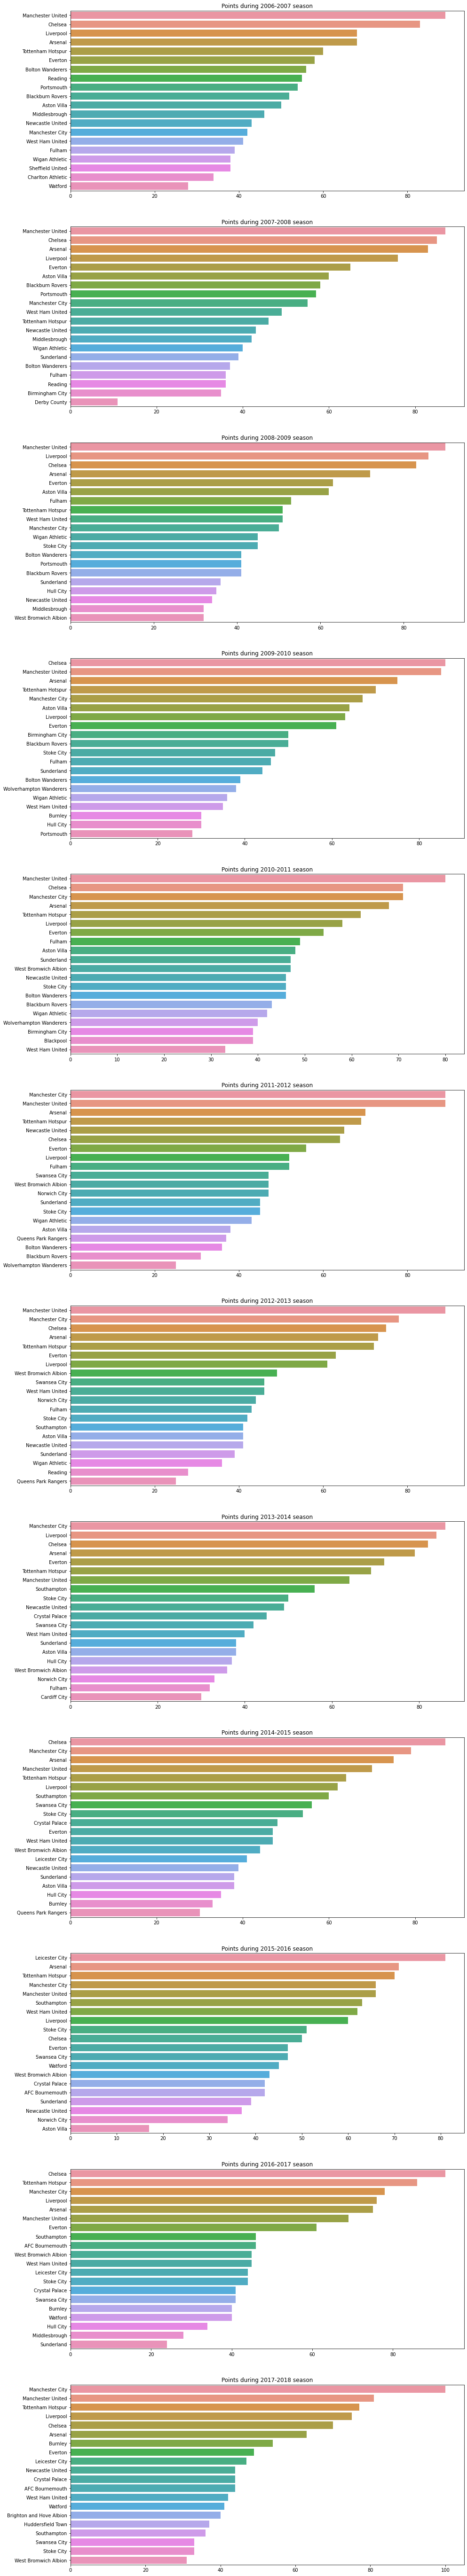

In [39]:
fig, ax = plt.subplots(12,1)
fig.set_size_inches(15,100)

for season,i in zip(seasons,range(12)):
    tmp = points.loc[points["season"] == season, ["team", "points", "goal difference"]].set_index(np.arange(1,21))
    sns.barplot(x=tmp["points"].values,y=tmp["team"].values,ax=ax[i])
    ax[i].set_title('Points during {} season'.format(seasons[i]))
    ax[i].set_ylabel('')

In [40]:
results_at_home = results.loc[:,['home_team','result',
                                 'season','home_goals']].groupby(["home_team", "result", "season"]).count().reset_index()

pd.set_option('display.max_rows', None)
results_at_home.loc[:,'result'] = results_at_home.loc[:,'result'].apply(lambda x: 'W' if x == 'H' else ('L' if x == 'A' else 'D'))
results_at_home.columns = results_at_home.columns[0:3].tolist() + ['games']
results_at_home.head()

home_team result     season  games
0  AFC Bournemouth      L  2015-2016      9
1  AFC Bournemouth      L  2016-2017      6
2  AFC Bournemouth      L  2017-2018      7
3  AFC Bournemouth      D  2015-2016      5
4  AFC Bournemouth      D  2016-2017      4

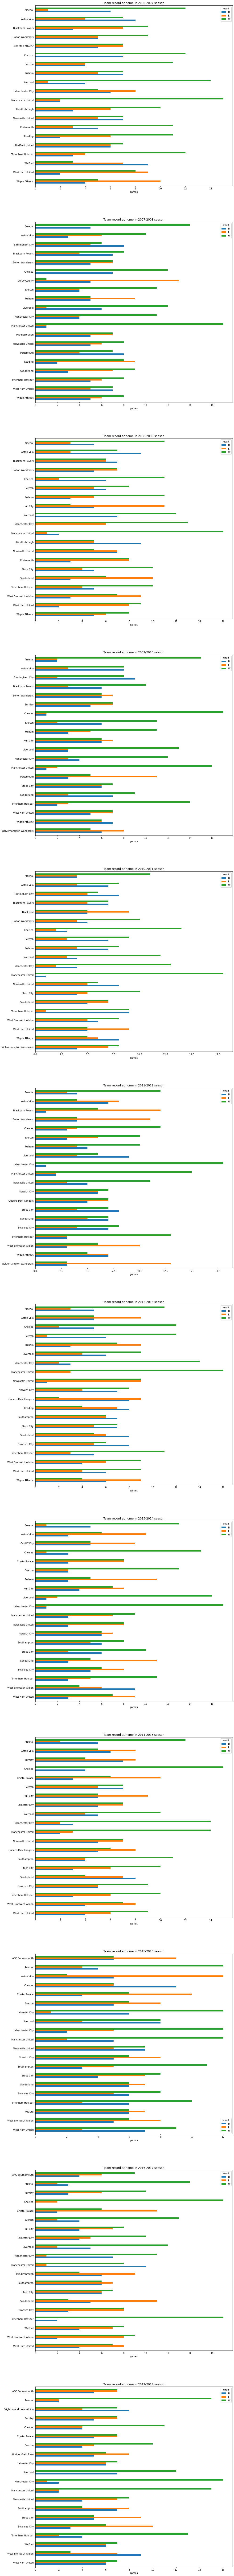

In [41]:
fig, ax1 = plt.subplots(12,1)
fig.set_size_inches(15,200)

for season,i in zip(seasons,range(12)):
    tmp = results_at_home.loc[results_at_home.season == season,['home_team','result','games']].set_index('home_team')
    tmp = tmp.pivot_table(values = 'games',index = ['home_team'],columns = ['result']).sort_index(ascending = False)
    tmp.plot(kind = 'barh',ax = ax1[i])
    ax1[i].set_title('Team record at home in {} season'.format(season))
    ax1[i].set_xlabel('games')
    ax1[i].set_ylabel('')

In [42]:
results_at_away = results.loc[:,['away_team','result',
                              'season','away_goals']].groupby(["away_team", "result", "season"]).count().reset_index()

pd.set_option('display.max_rows', None)
results_at_away.loc[:,'result'] = results_at_away.loc[:,'result'].apply(lambda x: 'W' if x == 'H' else ('L' if x == 'A' else 'D'))
results_at_away.columns = results_at_away.columns[0:3].tolist() + ['games']
results_at_away.head()

away_team result     season  games
0  AFC Bournemouth      L  2015-2016      6
1  AFC Bournemouth      L  2016-2017      3
2  AFC Bournemouth      L  2017-2018      4
3  AFC Bournemouth      D  2015-2016      4
4  AFC Bournemouth      D  2016-2017      6

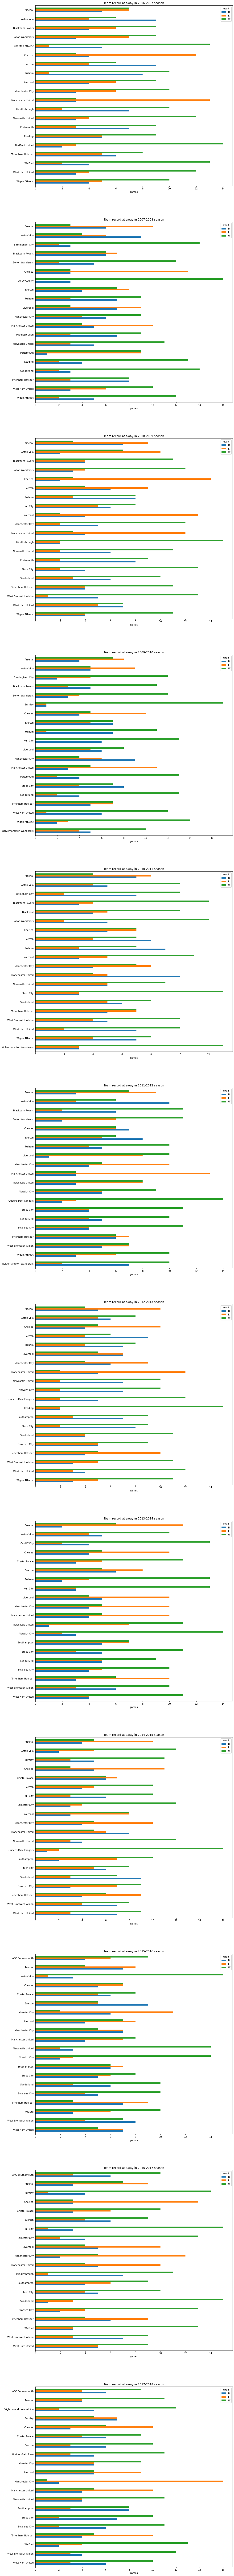

In [45]:
fig, ax2 = plt.subplots(12,1)
fig.set_size_inches(15,200)

for season,i in zip(seasons,range(12)):
    tmp = results_at_away.loc[results_at_away.season == season,['away_team','result','games']].set_index('away_team')
    tmp = tmp.pivot_table(values = 'games',index = ['away_team'],columns = ['result']).sort_index(ascending = False)
    tmp.plot(kind = 'barh',ax = ax2[i])
    ax2[i].set_title('Team record at away in {} season'.format(season))
    ax2[i].set_xlabel('games')
    ax2[i].set_ylabel('')

In [46]:
# Drugo razmatranje : uticaj datih golova na poziciju na tabeli 

In [47]:
goals_hometeam =results.loc[:,['home_team','home_goals','season']].groupby(['season','home_team']).sum().\
reset_index().sort_values(by=['season','home_goals'],ascending=[1,0])
goals_hometeam

season                 home_team  home_goals
10   2006-2007         Manchester United        46.0
0    2006-2007                   Arsenal        43.0
8    2006-2007                 Liverpool        39.0
5    2006-2007                   Chelsea        37.0
16   2006-2007         Tottenham Hotspur        34.0
6    2006-2007                   Everton        33.0
2    2006-2007          Blackburn Rovers        31.0
11   2006-2007             Middlesbrough        31.0
14   2006-2007                   Reading        29.0
13   2006-2007                Portsmouth        28.0
3    2006-2007          Bolton Wanderers        26.0
15   2006-2007          Sheffield United        24.0
18   2006-2007           West Ham United        24.0
12   2006-2007          Newcastle United        23.0
1    2006-2007               Aston Villa        20.0
4    2006-2007         Charlton Athletic        19.0
17   2006-2007                   Watford        19.0
7    2006-2007                    Fulham        18.0
19   2006-2007            Wigan Athletic        18.0
9    2006-2007           Manchester City        10.0
31   2007-2008         Manchester United        47.0
37   2007-2008         Tottenham Hotspur        46.0
29   2007-2008                 Liverpool        43.0
20   2007-2008                   Arsenal        37.0
25   2007-2008                   Chelsea        36.0
21   2007-2008               Aston Villa        34.0
27   2007-2008                   Everton        34.0
22   2007-2008           Birmingham City        30.0
30   2007-2008           Manchester City        28.0
32   2007-2008             Middlesbrough        27.0
23   2007-2008          Blackburn Rovers        26.0
33   2007-2008          Newcastle United        25.0
34   2007-2008                Portsmouth        24.0
38   2007-2008           West Ham United        24.0
24   2007-2008          Bolton Wanderers        23.0
36   2007-2008                Sunderland        23.0
28   2007-2008                    Fulham        22.0
39   2007-2008            Wigan Athletic        21.0
35   2007-2008                   Reading        19.0
26   2007-2008              Derby County        12.0
50   2008-2009         Manchester United        43.0
48   2008-2009                 Liverpool        41.0
49   2008-2009           Manchester City        40.0
44   2008-2009                   Chelsea        33.0
40   2008-2009                   Arsenal        31.0
45   2008-2009                   Everton        31.0
46   2008-2009                    Fulham        28.0
41   2008-2009               Aston Villa        27.0
53   2008-2009                Portsmouth        26.0
57   2008-2009      West Bromwich Albion        26.0
52   2008-2009          Newcastle United        24.0
58   2008-2009           West Ham United        23.0
42   2008-2009          Blackburn Rovers        22.0
54   2008-2009                Stoke City        22.0
43   2008-2009          Bolton Wanderers        21.0
55   2008-2009                Sunderland        21.0
56   2008-2009         Tottenham Hotspur        21.0
47   2008-2009                 Hull City        18.0
51   2008-2009             Middlesbrough        17.0
59   2008-2009            Wigan Athletic        17.0
66   2009-2010                   Chelsea        68.0
72   2009-2010         Manchester United        52.0
60   2009-2010                   Arsenal        48.0
70   2009-2010                 Liverpool        43.0
71   2009-2010           Manchester City        41.0
76   2009-2010         Tottenham Hotspur        40.0
67   2009-2010                   Everton        35.0
75   2009-2010                Sunderland        32.0
77   2009-2010           West Ham United        30.0
61   2009-2010               Aston Villa        29.0
63   2009-2010          Blackburn Rovers        28.0
68   2009-2010                    Fulham        27.0
64   2009-2010          Bolton Wanderers        26.0
65   2009-2010                   Burnley        25.0
73   2009-2010                Por

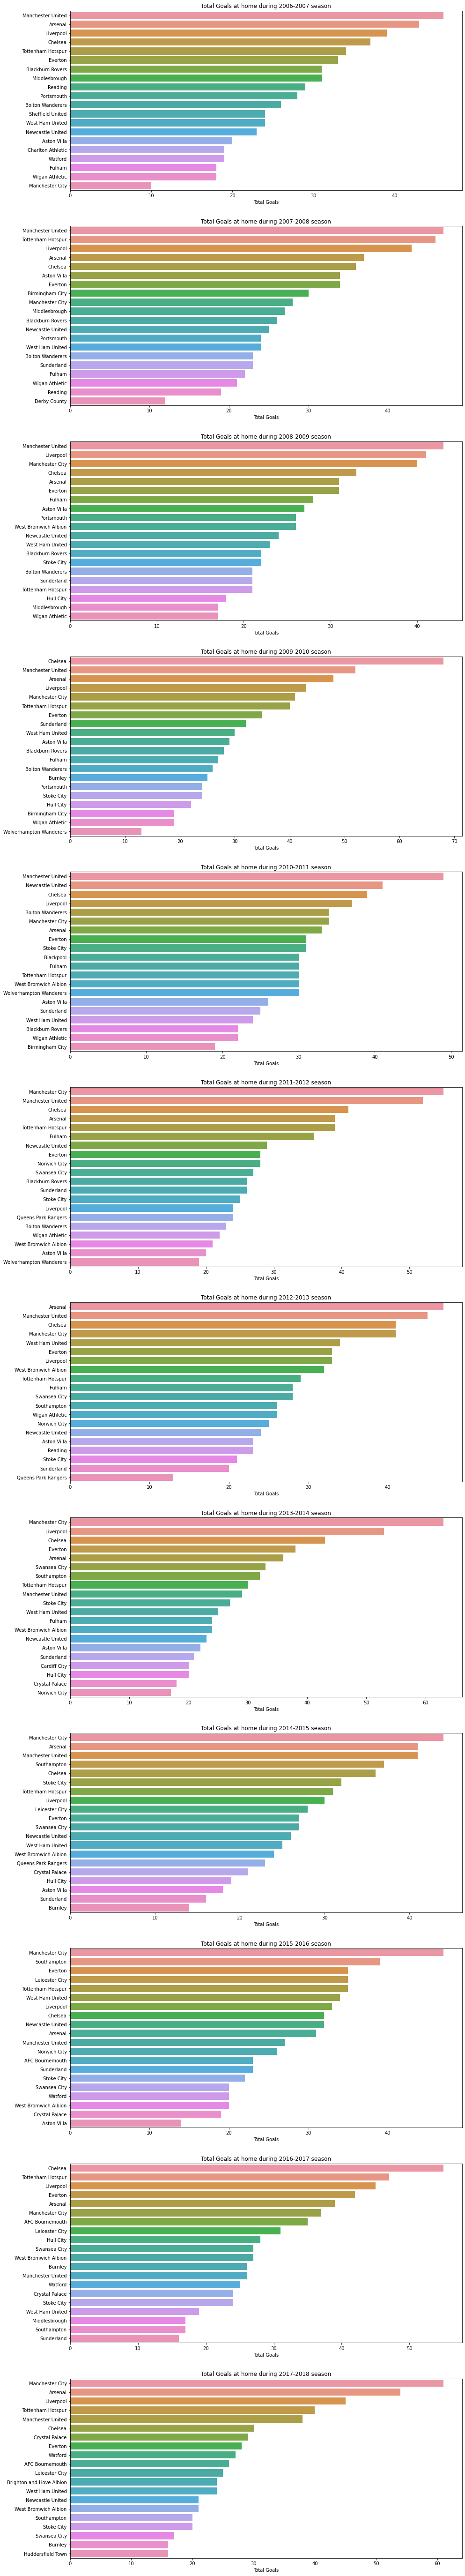

In [48]:
fig, ax3 = plt.subplots(len(seasons),1)
fig.set_size_inches(15,100)

for i in range(len(seasons)):
    sns.barplot(data = goals_hometeam.loc[goals_hometeam.season == seasons[i],:],\
                x='home_goals',y='home_team',ax=ax3[i])
    ax3[i].set_title('Total Goals at home during {} season'.format(seasons[i]))
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("")

In [49]:
goals_awayteam =results.loc[:,['away_team','away_goals','season']].groupby(['season','away_team']).sum().\
reset_index().sort_values(by=['season','away_goals'],ascending=[1,0])
goals_awayteam

season                 away_team  away_goals
10   2006-2007         Manchester United        37.0
5    2006-2007                   Chelsea        27.0
1    2006-2007               Aston Villa        23.0
14   2006-2007                   Reading        23.0
16   2006-2007         Tottenham Hotspur        23.0
2    2006-2007          Blackburn Rovers        21.0
3    2006-2007          Bolton Wanderers        21.0
0    2006-2007                   Arsenal        20.0
7    2006-2007                    Fulham        20.0
6    2006-2007                   Everton        19.0
9    2006-2007           Manchester City        19.0
19   2006-2007            Wigan Athletic        19.0
8    2006-2007                 Liverpool        18.0
13   2006-2007                Portsmouth        17.0
4    2006-2007         Charlton Athletic        15.0
12   2006-2007          Newcastle United        15.0
11   2006-2007             Middlesbrough        13.0
18   2006-2007           West Ham United        11.0
17   2006-2007                   Watford        10.0
15   2006-2007          Sheffield United         8.0
20   2007-2008                   Arsenal        37.0
21   2007-2008               Aston Villa        37.0
31   2007-2008         Manchester United        33.0
25   2007-2008                   Chelsea        29.0
23   2007-2008          Blackburn Rovers        24.0
29   2007-2008                 Liverpool        24.0
34   2007-2008                Portsmouth        24.0
35   2007-2008                   Reading        22.0
27   2007-2008                   Everton        21.0
33   2007-2008          Newcastle United        20.0
37   2007-2008         Tottenham Hotspur        20.0
38   2007-2008           West Ham United        18.0
30   2007-2008           Manchester City        17.0
22   2007-2008           Birmingham City        16.0
28   2007-2008                    Fulham        16.0
32   2007-2008             Middlesbrough        16.0
24   2007-2008          Bolton Wanderers        13.0
36   2007-2008                Sunderland        13.0
39   2007-2008            Wigan Athletic        13.0
26   2007-2008              Derby County         8.0
40   2008-2009                   Arsenal        37.0
48   2008-2009                 Liverpool        36.0
44   2008-2009                   Chelsea        35.0
41   2008-2009               Aston Villa        27.0
50   2008-2009         Manchester United        25.0
45   2008-2009                   Everton        24.0
56   2008-2009         Tottenham Hotspur        24.0
47   2008-2009                 Hull City        21.0
43   2008-2009          Bolton Wanderers        20.0
58   2008-2009           West Ham United        19.0
42   2008-2009          Blackburn Rovers        18.0
49   2008-2009           Manchester City        18.0
59   2008-2009            Wigan Athletic        17.0
52   2008-2009          Newcastle United        16.0
54   2008-2009                Stoke City        16.0
55   2008-2009                Sunderland        13.0
53   2008-2009                Portsmouth        12.0
46   2008-2009                    Fulham        11.0
51   2008-2009             Middlesbrough        11.0
57   2008-2009      West Bromwich Albion        10.0
60   2009-2010                   Arsenal        35.0
66   2009-2010                   Chelsea        35.0
72   2009-2010         Manchester United        34.0
71   2009-2010           Manchester City        32.0
76   2009-2010         Tottenham Hotspur        27.0
67   2009-2010                   Everton        25.0
61   2009-2010               Aston Villa        23.0
62   2009-2010           Birmingham City        19.0
79   2009-2010   Wolverhampton Wanderers        19.0
70   2009-2010                 Liverpool        18.0
78   2009-2010            Wigan Athletic        18.0
65   2009-2010                   Burnley        17.0
77   2009-2010           West Ham United        17.0
64   2009-2010          Bolton Wanderers        16.0
75   2009-2010                Sun

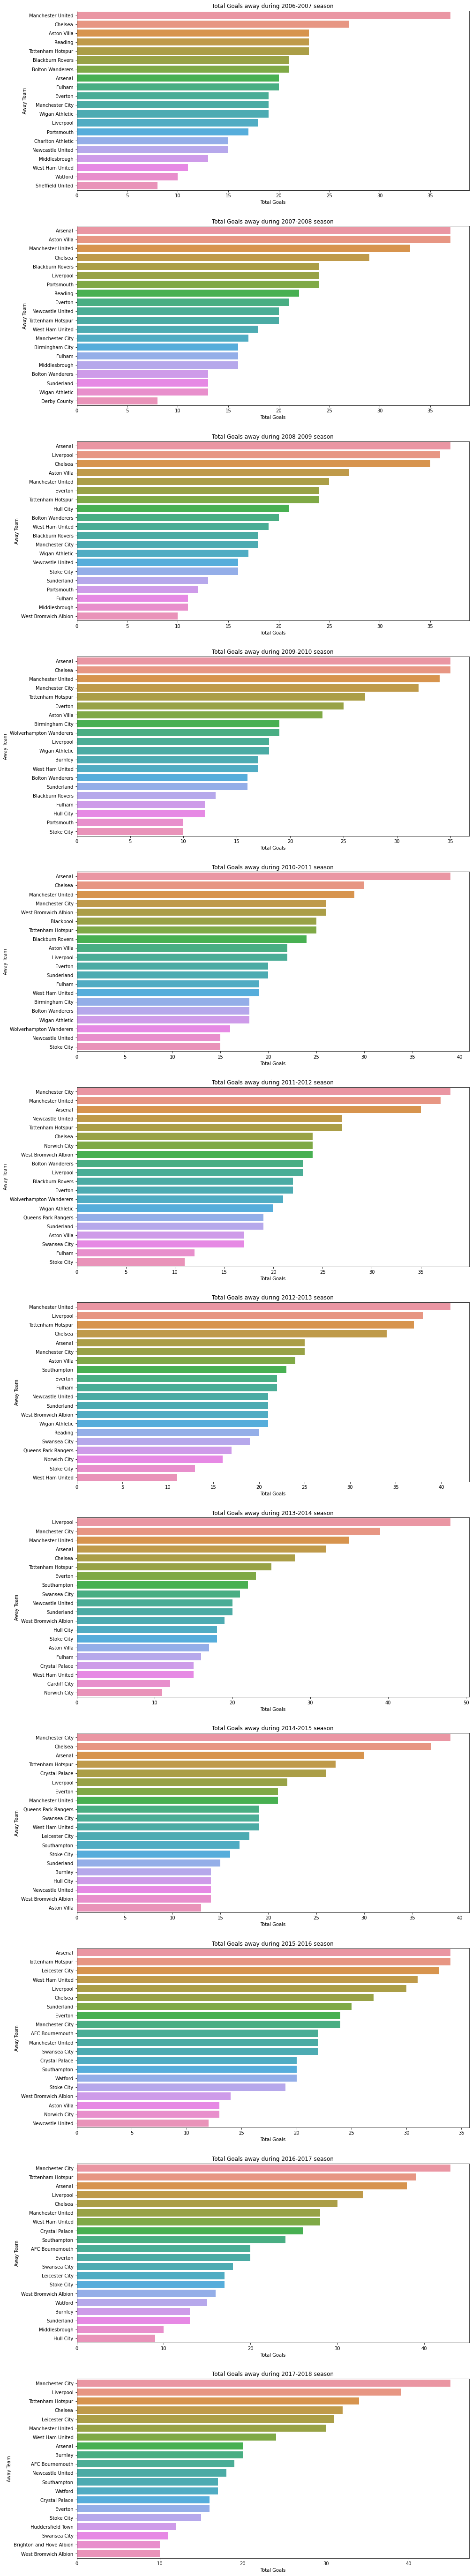

In [50]:
fig, ax4 = plt.subplots(len(seasons),1)
fig.set_size_inches(15,100)

for i in range(len(seasons)):
    sns.barplot(data = goals_awayteam.loc[goals_awayteam.season == seasons[i],:],\
                x='away_goals',y='away_team',ax=ax4[i])
    ax4[i].set_title('Total Goals away during {} season'.format(seasons[i]))
    ax4[i].set_xlabel("Total Goals")
    ax4[i].set_ylabel("Away Team")

In [51]:
# Trece razmatranje : uticaj gol razlike na poziciju na tabeli

In [73]:
goal_difference = points.loc[:,["team","season","goal difference"]]
goal_difference = goal_difference.pivot('team','season','goal difference')

points_heat = points.loc[:,["team","season","points"]]
points_heat = points_heat.pivot("team","season","points")

In [76]:
goal_difference = points.loc[:,["team","season","goal difference"]]
goal_difference = goal_difference.pivot('team','season','goal difference')
goal_difference.head()

season            2006-2007  2007-2008  2008-2009  2009-2010  2010-2011  ...  \
team                                                                     ...   
AFC Bournemouth         NaN        NaN        NaN        NaN        NaN  ...   
Arsenal                28.0       43.0       31.0       42.0       29.0  ...   
Aston Villa             2.0       20.0        6.0       13.0      -11.0  ...   
Birmingham City         NaN      -16.0        NaN       -9.0      -21.0  ...   
Blackburn Rovers       -2.0        2.0      -20.0      -14.0      -13.0  ...   

season            2013-2014  2014-2015  2015-2016  2016-2017  2017-2018  
team                                                                     
AFC Bournemouth         NaN        NaN      -22.0      -12.0      -16.0  
Arsenal                27.0       35.0       29.0       33.0       23.0  
Aston Villa           -22.0      -26.0      -49.0        NaN        NaN  
Birmingham City         NaN        NaN        NaN        NaN        NaN  
Blackburn Rovers        NaN        NaN        NaN        NaN        NaN  

[5 rows x 12 columns]

In [53]:
goal_difference1 = points.loc[:,["team","season","goal difference"]]
goal_difference1

team     season  goal difference
220           Manchester City  2017-2018             79.0
221         Manchester United  2017-2018             40.0
222         Tottenham Hotspur  2017-2018             38.0
224                 Liverpool  2017-2018             46.0
223                   Chelsea  2017-2018             24.0
225                   Arsenal  2017-2018             23.0
226                   Burnley  2017-2018             -3.0
227                   Everton  2017-2018            -14.0
228            Leicester City  2017-2018             -4.0
229          Newcastle United  2017-2018             -8.0
231            Crystal Palace  2017-2018            -10.0
230           AFC Bournemouth  2017-2018            -16.0
233           West Ham United  2017-2018            -20.0
232                   Watford  2017-2018            -20.0
234  Brighton and Hove Albion  2017-2018            -20.0
235         Huddersfield Town  2017-2018            -30.0
237               Southampton  2017-2018            -19.0
236              Swansea City  2017-2018            -28.0
238                Stoke City  2017-2018            -33.0
239      West Bromwich Albion  2017-2018            -25.0
200                   Chelsea  2016-2017             52.0
201         Tottenham Hotspur  2016-2017             60.0
203           Manchester City  2016-2017             41.0
204                 Liverpool  2016-2017             36.0
202                   Arsenal  2016-2017             33.0
205         Manchester United  2016-2017             25.0
206                   Everton  2016-2017             18.0
210               Southampton  2016-2017             -7.0
207           AFC Bournemouth  2016-2017            -12.0
212      West Bromwich Albion  2016-2017             -8.0
213           West Ham United  2016-2017            -17.0
209            Leicester City  2016-2017            -15.0
215                Stoke City  2016-2017            -15.0
208            Crystal Palace  2016-2017            -13.0
211              Swansea City  2016-2017            -25.0
214                   Burnley  2016-2017            -16.0
216                   Watford  2016-2017            -28.0
217                 Hull City  2016-2017            -43.0
219             Middlesbrough  2016-2017            -26.0
218                Sunderland  2016-2017            -40.0
180            Leicester City  2015-2016             32.0
181                   Arsenal  2015-2016             29.0
184         Tottenham Hotspur  2015-2016             34.0
182           Manchester City  2015-2016             30.0
183         Manchester United  2015-2016             14.0
185               Southampton  2015-2016             18.0
187           West Ham United  2015-2016             14.0
186                 Liverpool  2015-2016             13.0
188                Stoke City  2015-2016            -14.0
189                   Chelsea  2015-2016              6.0
194                   Everton  2015-2016              4.0
190              Swansea City  2015-2016            -10.0
191                   Watford  2015-2016            -10.0
195      West Bromwich Albion  2015-2016            -14.0
193            Crystal Palace  2015-2016            -12.0
192           AFC Bournemouth  2015-2016            -22.0
198                Sunderland  2015-2016            -14.0
196          Newcastle United  2015-2016            -21.0
197              Norwich City  2015-2016            -28.0
199               Aston Villa  2015-2016            -49.0
160                   Chelsea  2014-2015             41.0
161           Manchester City  2014-2015             45.0
162                   Arsenal  2014-2015             35.0
163         Manchester United  2014-2015             25.0
164         Tottenham Hotspur  2014-2015              5.0
165                 Liverpool  2014-2015              4.0
166               Southampton  2014-2015             21.0
167              Swansea City  2014-2015             -3.0
168                Stok

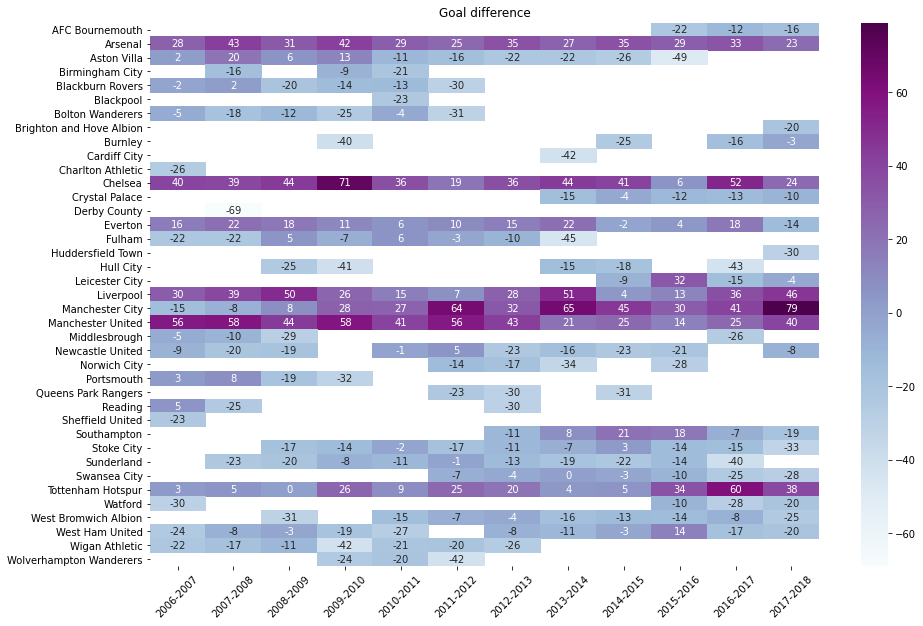

In [54]:
fig,ax5 = plt.subplots()
fig.set_size_inches(15,10)

sns.heatmap(goal_difference,annot=True,cmap="BuPu",ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=45)
ax5.set_title('Goal difference')
ax5.set_xlabel('')
ax5.set_ylabel('')
plt.show()

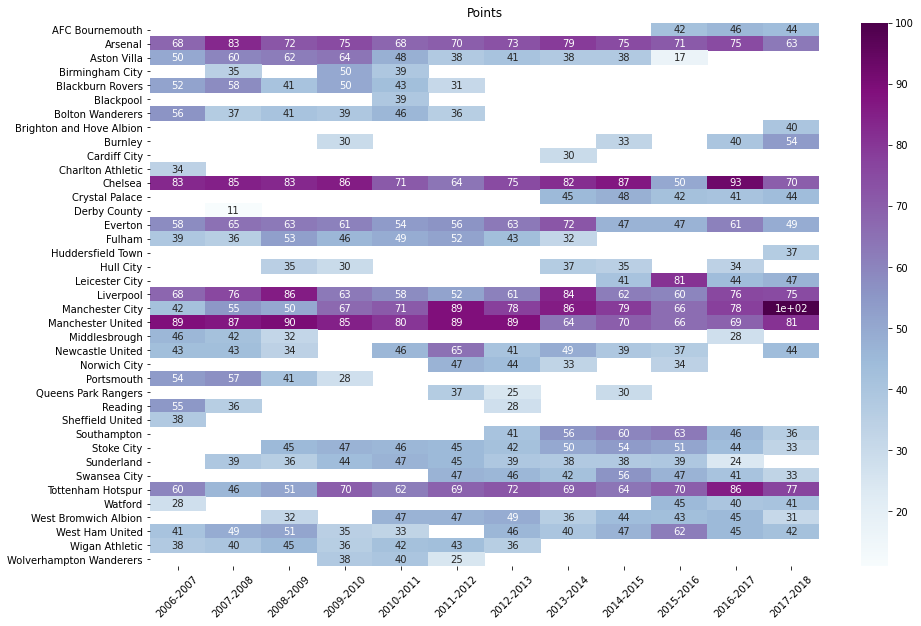

In [55]:
fig,ax6 = plt.subplots()
fig.set_size_inches(15,10)

sns.heatmap(points_heat,annot=True,cmap="BuPu",ax=ax6)
ax6.set_xticklabels(ax5.get_xticklabels(),rotation=45)
ax6.set_title('Points')
ax6.set_xlabel('')
ax6.set_ylabel('')
plt.show()

In [56]:
points.loc[points["season"] == "2015-2016", ["team", "goal difference"]].set_index(np.arange(1,21))

team  goal difference
1         Leicester City             32.0
2                Arsenal             29.0
3      Tottenham Hotspur             34.0
4        Manchester City             30.0
5      Manchester United             14.0
6            Southampton             18.0
7        West Ham United             14.0
8              Liverpool             13.0
9             Stoke City            -14.0
10               Chelsea              6.0
11               Everton              4.0
12          Swansea City            -10.0
13               Watford            -10.0
14  West Bromwich Albion            -14.0
15        Crystal Palace            -12.0
16       AFC Bournemouth            -22.0
17            Sunderland            -14.0
18      Newcastle United            -21.0
19          Norwich City            -28.0
20           Aston Villa            -49.0

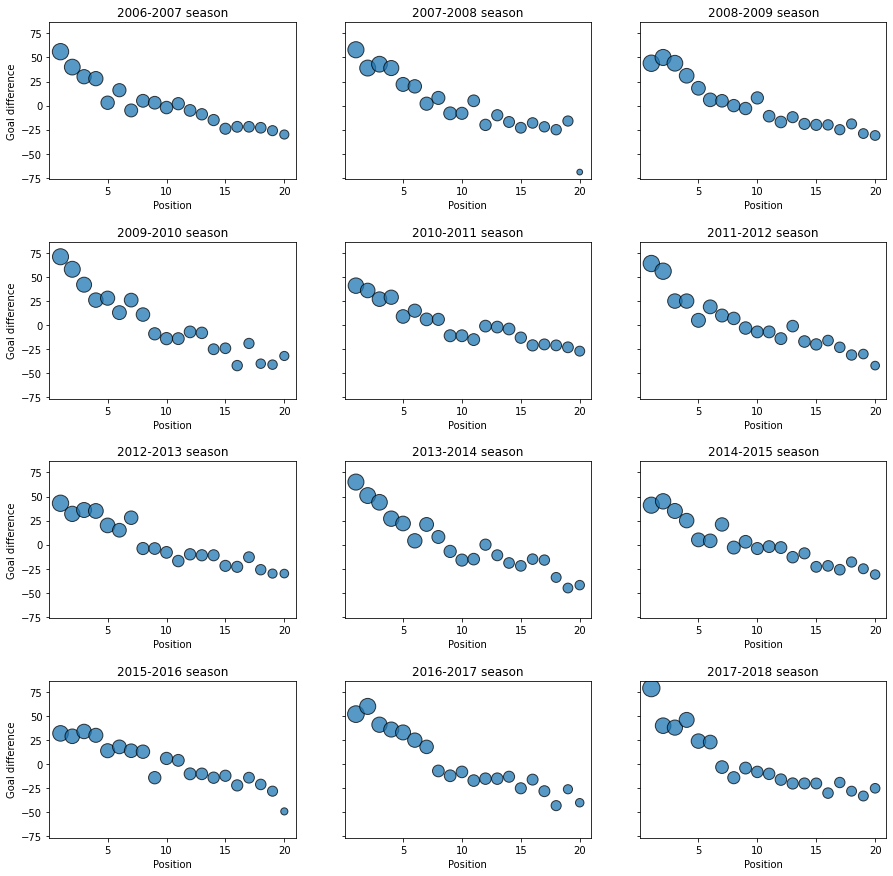

In [57]:
fig, axis = plt.subplots(4,3,figsize=(15,15),sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
axis = axis.ravel()

for season,i in zip(seasons,range(12)):
        tmp = points.loc[points["season"] == season, ["team", "points","goal difference"]].set_index(np.arange(1,21))
        sns.scatterplot(x=tmp.index,y=tmp["goal difference"].values,ax=axis[i],edgecolor="black",
                       linewidth=1, alpha=0.75, s=tmp["points"]*3)
        axis[i].set_title('{} season'.format(seasons[i]))
        axis[i].set_xlabel('Position')
        axis[i].set_ylabel('Goal difference')

